# Conjunto de dados para previsão de gordura corporal
##### Estimativas de gordura corporal e diversas medidas de circunferência corporal para 252 homens.

# Predição de Gordura Corporal com CRISP-DM

Este notebook implementa uma análise exploratória e um modelo de regressão para prever o percentual de gordura corporal (body fat) com base em variáveis antropométricas. Todo o processo segue a metodologia CRISP-DM (Cross-Industry Standard Process for Data Mining), abrangendo desde o entendimento do negócio até a modelagem e avaliação.

## 1. Entendimento do Negócio (Business Understanding)

**Objetivo:**  
Desenvolver um modelo de Machine Learning capaz de prever o percentual de gordura corporal a partir de medidas físicas como peso, altura, circunferências corporais e dobras cutâneas. Esse tipo de estimativa pode ser útil em academia, saúde preventiva, nutrição e avaliação física.

**Motivação:**  
Medições diretas de gordura corporal, como DEXA ou pesagem hidrostática, são caras e pouco acessíveis. Um modelo preditivo baseado em medidas simples e de baixo custo pode democratizar esse tipo de avaliação.

**Métricas de Sucesso:**  
Como se trata de um problema de regressão, serão priorizadas métricas como:

- **MAE** (Mean Absolute Error)  
- **RMSE** (Root Mean Squared Error)  
- **R²** (Coeficiente de Determinação)

Um modelo de sucesso deve prever a gordura corporal com erro médio suficientemente baixo para ser aplicável em avaliações físicas reais.

## 2. Entendimento dos Dados (Data Understanding)

Nesta etapa, exploramos o dataset para compreender sua estrutura, distribuição das variáveis, possíveis inconsistências e relacionamentos importantes para a modelagem.

### 2.1 Carregamento e Visão Geral Inicial

O dataset **[Body Fat Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset)**, disponível no Kaggle, contém medições antropométricas de indivíduos, incluindo:

- Idade  
- Peso  
- Altura  
- Circunferências corporais (abdômen, quadril, peito, coxa etc.)   
- Percentual de gordura corporal (variável alvo)

Nesta fase investigaremos:

- Estatísticas descritivas  
- Distribuição das variáveis  
- Outliers  
- Correlações entre atributos  
- Possíveis problemas de qualidade ou inconsistência nos dados  

Esses insights orientarão as etapas seguintes de preparação e modelagem.

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# Nome do arquivo principal do dataset no Kaggle
file_path = "bodyfat.csv"

# Carrega o dataset usando KaggleHub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/body-fat-prediction-dataset",
    file_path,
)

# Visão geral inicial
print(f"Formato do dataset: {df.shape}")
display(df.head())

C:\Users\elias\AppData\Local\Temp\ipykernel_19820\474400014.py:9: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Formato do dataset: (252, 15)


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [ ]:
print("Tipos das variáveis:")
print(df.dtypes)

Tipos das variáveis:
Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object


In [ ]:
print("Estatísticas descritivas:")
display(df.describe())

Estatísticas descritivas:


,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [ ]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64


## 2.2 Análise Exploratória dos Dados (Exploratory Data Analysis – EDA)

Nesta etapa analisaremos estatisticamente e graficamente o comportamento das variáveis do dataset.  
O objetivo principal é:

- Identificar padrões e tendências
- Verificar presença de outliers
- Avaliar relações entre features e a variável alvo (`BodyFat`)
- Detectar colinearidade entre variáveis
- Verificar distribuições e possíveis assimetrias

O EDA é fundamental para orientar as etapas de preparação e seleção de atributos.

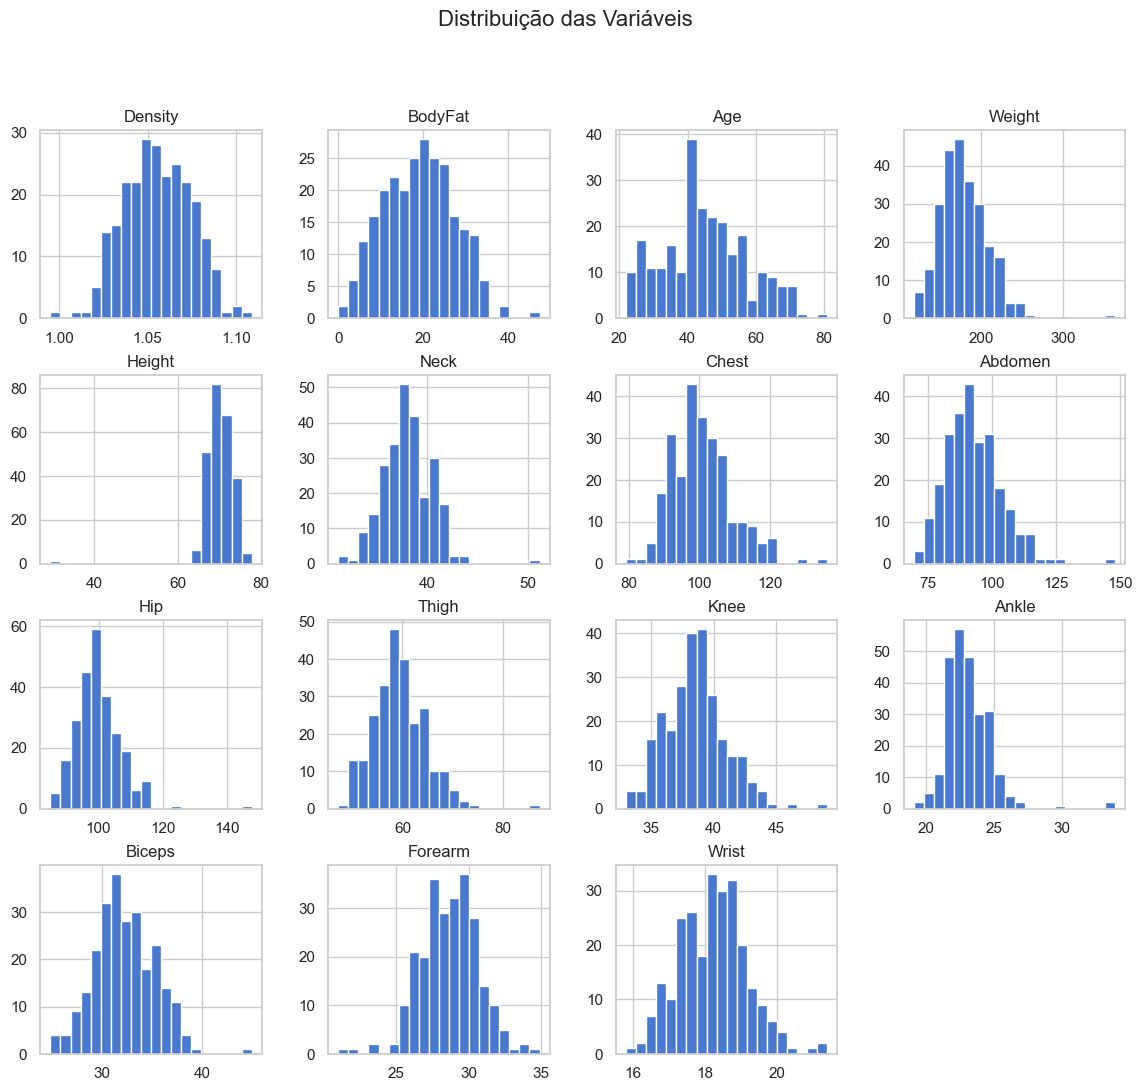

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo: fundo branco com grind cinza claro
sns.set(style="whitegrid", palette="muted")

# Histogramas de todas as variáveis
df.hist(figsize=(14, 12), bins=20)
plt.suptitle("Distribuição das Variáveis", fontsize=16)
plt.show()

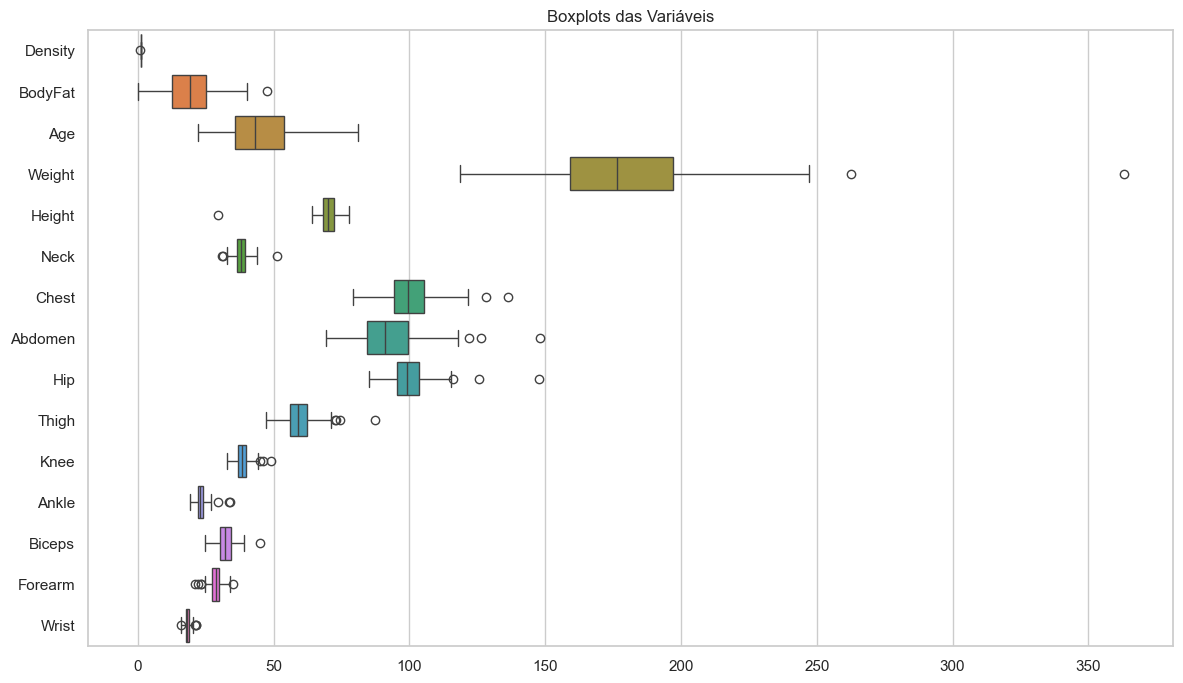

In [6]:
# Boxplots para identificar outliers
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, orient="h")
plt.title("Boxplots das Variáveis")
plt.show()

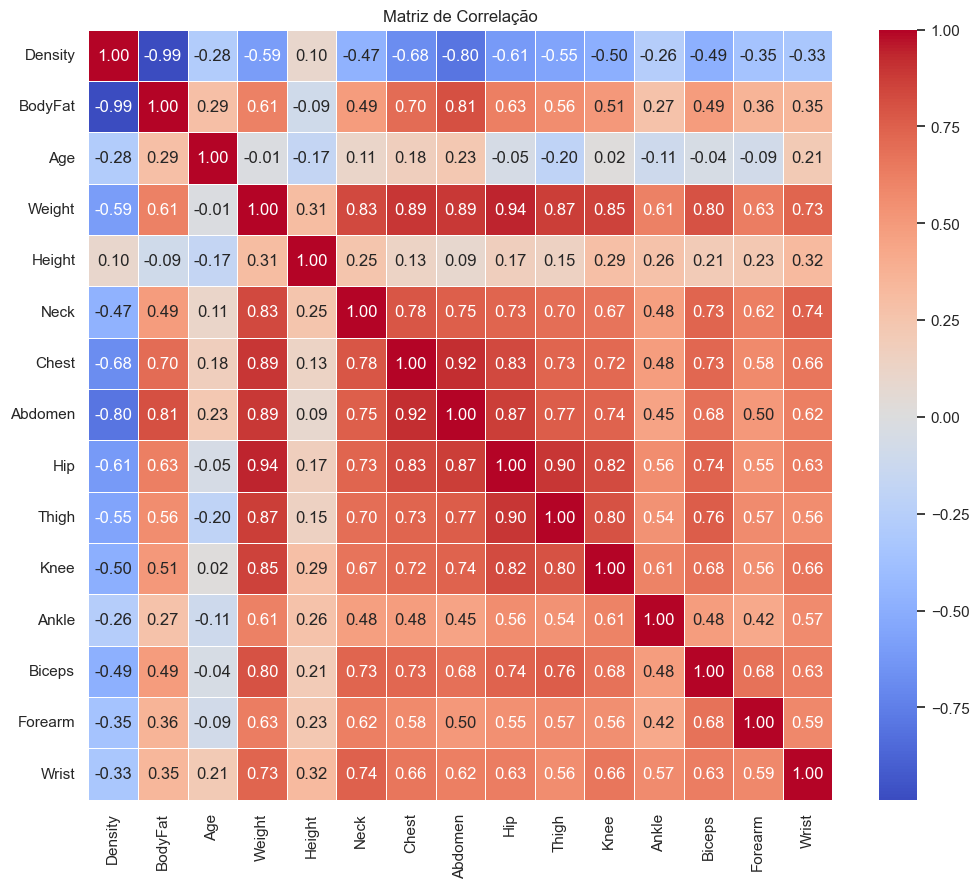

In [7]:
# Matriz de correlação
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

In [8]:
# Correlação da variável alvo as features
target_corr = corr["BodyFat"].sort_values(ascending=False)
print("Correlação das variáveis com BodyFat:\n")
print(target_corr)

Correlação das variáveis com BodyFat:

BodyFat    1.000000
Abdomen    0.813432
Chest      0.702620
Hip        0.625201
Weight     0.612414
Thigh      0.559608
Knee       0.508665
Biceps     0.493271
Neck       0.490592
Forearm    0.361387
Wrist      0.346575
Age        0.291458
Ankle      0.265970
Height    -0.089495
Density   -0.987782
Name: BodyFat, dtype: float64


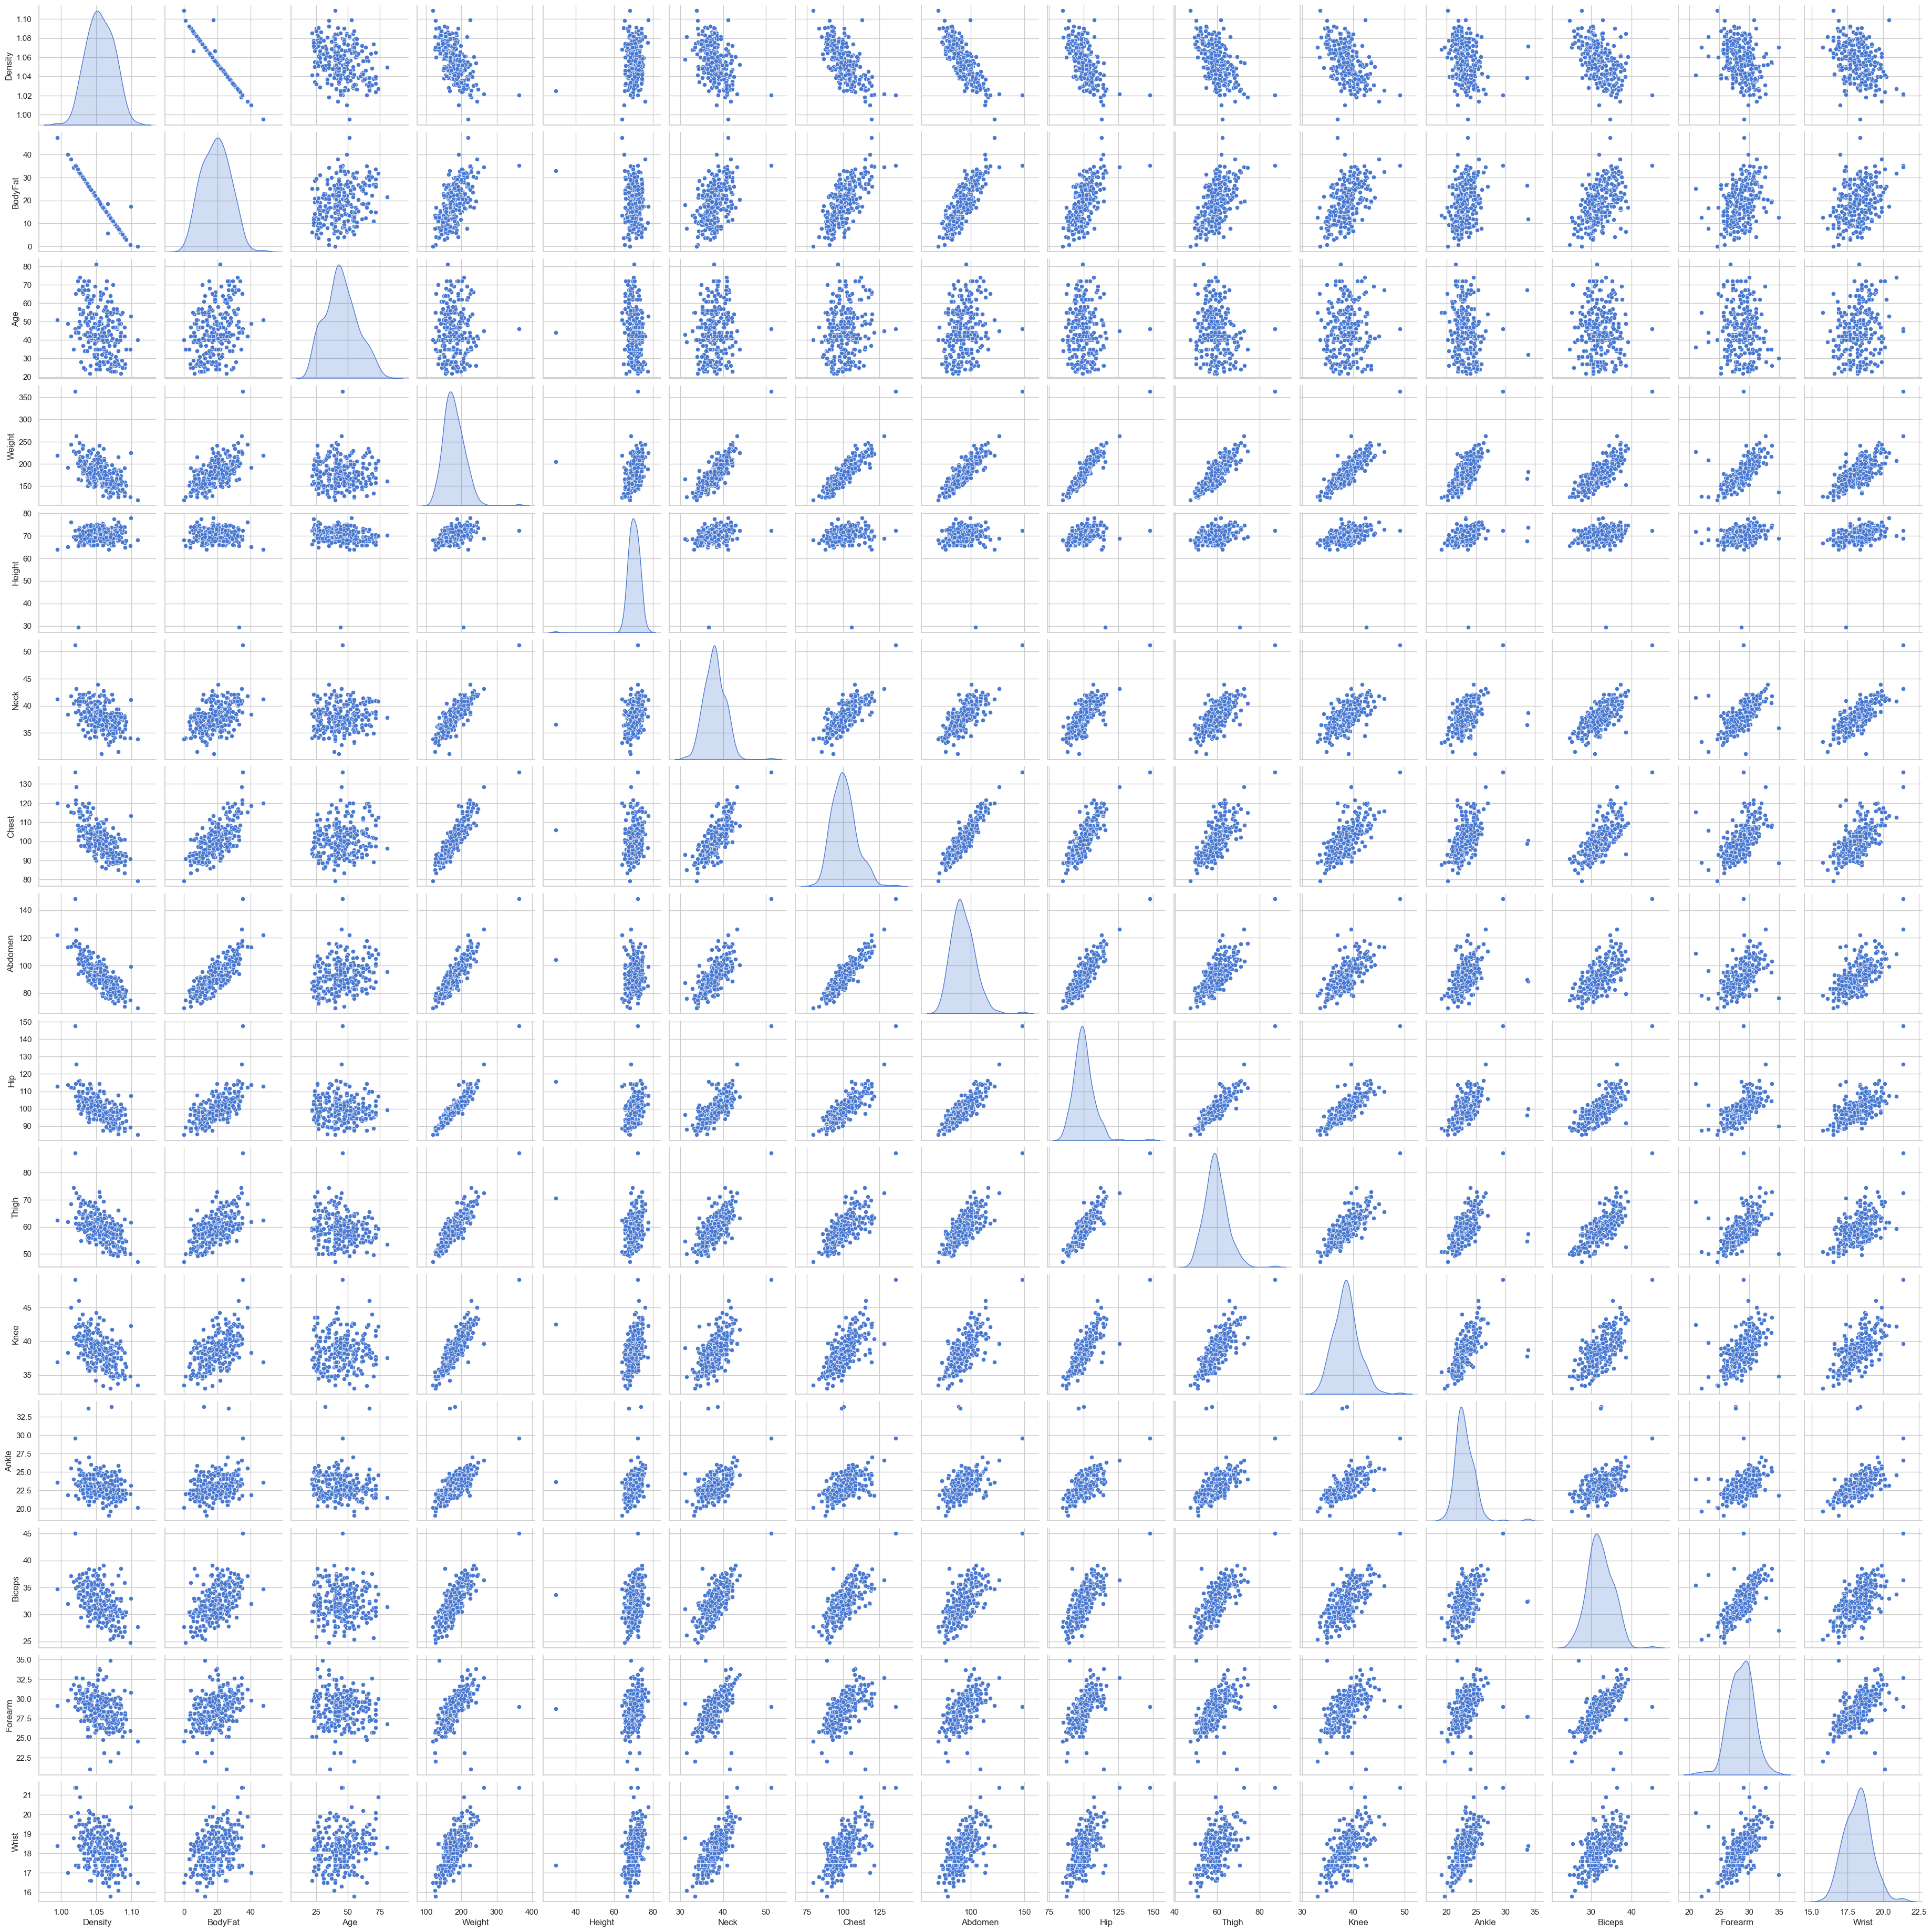

In [9]:
# Pairplot das variáveis
sns.pairplot(df, diag_kind="kde")
plt.show()

## 2.3 Análise de Outliers

Nesta etapa, buscamos identificar valores extremos nas variáveis do dataset. Outliers podem influenciar de forma significativa o desempenho de modelos de Machine Learning, especialmente modelos sensíveis a escala ou distância.  
Para isso, aplicamos duas abordagens complementares:

### 2.3.1 Detecção de Outliers com Z-Score

O método Z-score considera como outliers os valores que se afastam da média por mais de um número pré-definido de desvios-padrão (comumente 3).  

Fórmula:


$Z = \frac{x - \mu}{\sigma}$


Valores com |Z| > 3 são marcados como possíveis outliers.

In [10]:
import numpy as np

# Z-SCORE METHOD
def detectar_outliers_zscore(df, columns, threshold=3):
    outliers = {}
    for col in columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std()
        mask = np.abs(z_scores) > threshold
        outliers[col] = df[mask]
    return outliers

### 2.3.2 Detecção de Outliers com IQR (Interquartile Range)

O método IQR utiliza limites baseados nos quartis da distribuição:


$\text{IQR} = Q3 - Q1$


Outliers são definidos como valores abaixo de:


$Q1 - 1.5 \times IQR$


ou acima de:


$Q3 + 1.5 \times IQR$

Esse método é mais robusto contra distribuições assimétricas.

In [11]:
# IQR METHOD
def detectar_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        mask = (df[col] < limite_inferior) | (df[col] > limite_superior)
        outliers[col] = df[mask]
    return outliers

### 2.3.3 Resultados da Identificação

Aplicamos ambos os métodos às variáveis numéricas do dataset.  
A saída exibe quantos outliers foram encontrados por coluna, usando:

- **Z-Score**
- **IQR**

Essa análise complementa os boxplots feitos na etapa anterior, oferecendo uma visão numérica sobre a presença de valores extremos.

In [12]:
# Seleciona as colunas numéricas
colunas_numericas = df.select_dtypes(include=['float64','int64']).columns

# Aplicando Z-Score
outliers_z = detectar_outliers_zscore(df, colunas_numericas)

print("===== OUTLIERS PELO Z-SCORE =====")
for col, out in outliers_z.items():
    print(f"{col}: {len(out)} outliers encontrados")

# Aplicando IQR
outliers_iqr = detectar_outliers_iqr(df, colunas_numericas)

print("\n===== OUTLIERS PELO IQR =====")
for col, out in outliers_iqr.items():
    print(f"{col}: {len(out)} outliers encontrados")

===== OUTLIERS PELO Z-SCORE =====
Density: 1 outliers encontrados
BodyFat: 1 outliers encontrados
Age: 0 outliers encontrados
Weight: 1 outliers encontrados
Height: 1 outliers encontrados
Neck: 1 outliers encontrados
Chest: 2 outliers encontrados
Abdomen: 2 outliers encontrados
Hip: 2 outliers encontrados
Thigh: 1 outliers encontrados
Knee: 2 outliers encontrados
Ankle: 3 outliers encontrados
Biceps: 1 outliers encontrados
Forearm: 3 outliers encontrados
Wrist: 2 outliers encontrados

===== OUTLIERS PELO IQR =====
Density: 1 outliers encontrados
BodyFat: 1 outliers encontrados
Age: 0 outliers encontrados
Weight: 2 outliers encontrados
Height: 1 outliers encontrados
Neck: 3 outliers encontrados
Chest: 2 outliers encontrados
Abdomen: 3 outliers encontrados
Hip: 3 outliers encontrados
Thigh: 4 outliers encontrados
Knee: 3 outliers encontrados
Ankle: 3 outliers encontrados
Biceps: 1 outliers encontrados
Forearm: 5 outliers encontrados
Wrist: 4 outliers encontrados


## 2.4 Tratamento dos Outliers

Após identificar os outliers com os métodos Z-Score e IQR, é importante avaliar estratégias adequadas para lidar com esses valores extremos.  
Os outliers afetam significativamente modelos de regressão, aumentando erro médio, enviesando coeficientes e prejudicando a capacidade de generalização dos modelos de ML.

Nesta etapa, apresentarei **as principais abordagens para tratamento de outliers** (Fonte: Vozes da minha mente, ou não kkk), explicando vantagens, desvantagens e quando cada técnica é recomendada. Por fim, irei justificar a estratégia adotada para o projeto.

### 2.4.1 Remoção de Outliers (Trim)
Consiste em remover completamente as linhas que contêm valores extremos.

#### Prós:
- Simples e direto.
- Elimina totalmente a influência de valores extremos.
- Útil quando outliers são erros de medição ou entrada incorreta.

#### Contras:
- Perda de dados (extremamente grave em datasets pequenos).
- Pode remover casos legítimos.
- Pode introduzir viés amostral.

#### Adequado quando:
- Há evidências claras de erro na coleta.
- O dataset é grande o suficiente para suportar perda de registros.
- Os outliers são fáceis de justificar como inválidos.

### 2.4.2 Winsorização (Capping)
Limita valores extremos aos limites máximo e mínimo aceitáveis, como:


$Q1 - 1.5 \cdot IQR \quad \text{e} \quad Q3 + 1.5 \cdot IQR$

#### Prós:
- Mantém o tamanho do dataset.
- Reduz impacto dos outliers sem removê-los.
- Adequado para variáveis contínuas fisiológicas.

#### Contras:
- Pode distorcer levemente a distribuição.
- Não elimina totalmente anomalias, apenas reduz impacto.

#### Adequado quando:
- Os outliers são legítimos, porém extremos.
- Trabalha-se com regressão linear ou modelos estatísticos sensíveis a pressupostos de normalidade.
- Queremos manter todas as observações.
- A variável é contínua.

### 2.4.3 Transformações Matemáticas  
(Log, Raiz Quadrada, Box-Cox, Yeo-Johnson)

Aplica transformações que “esmagam” valores extremos.

#### Prós:
- Reduz assimetria.
- Melhora a normalidade dos dados.
- Pode melhorar desempenho de regressão e redes neurais.
- Estabiliza a variância dos dados (homocedasticidade), um pressuposto chave em modelos de regressão.
- Mantém a ordenação e a relação (monotônica) entre os valores originais, preservando a essência da variável.

#### Contras:
- Muda escala e interpretação.
- Não resolve outliers muito extremos.
- Transformações log e Box-Cox não aceitam valores $\le 0$ (necessidade de deslocamento/shift).
- A escolha da melhor transformação pode ser subjetiva e exigir testes de ajuste (e.g., testes de normalidade).

#### Adequado quando:
- A variável é altamente assimétrica (especialmente com cauda à direita).
- Há interesse em melhorar a normalidade.
- O modelo assume distribuição mais próxima da normal (e.g., Regressão Linear Múltipla).
- Há a necessidade de estabilizar a variância ou linearizar uma relação curvilínea entre variáveis no modelo.

### 2.4.4 Modelos Robustos a Outliers  
(StandardScaler Robust, Regressão Robusta, Árvores, RandomForest, XGBoost)

Alguns algoritmos são pouco sensíveis a outliers ou usam métricas robustas (como mediana e IQR).

#### Prós:
- Evita a necessidade de alterar os dados.
- Árvores de decisão ignoram outliers naturalmente (a divisão é baseada na ordenação, não na magnitude).
- Padronização robusta (como RobustScaler) melhora métodos lineares.
- Reduz o risco de overfitting causado por um modelo que tenta ajustar-se demais aos pontos extremos (outliers).
- Preserva a interpretabilidade dos dados originais, pois não há transformações na escala das features.
#### Contras:
- Nem sempre resolve para todos os modelos.
- Em regressões simples, o problema persiste (a menos que use Regressão Robusta, como RANSAC ou Huber).
- Modelos baseados em distâncias (como k-NN ou k-Means) continuam sendo sensíveis mesmo com padronização robusta, pois a distância ainda será influenciada pelo outlier.
- A robustez dos modelos de árvores pode levar a uma interpretação limitada de por que uma instância específica foi classificada de certa forma.
#### Adequado quando:
- O modelo escolhido tolera outliers (árvores, boosting).
- Não se quer modificar o dataset original.
- O volume de outliers é pequeno a moderado.
- O objetivo é construir um modelo preditivo forte sem focar na interpretação estatística tradicional (onde a remoção/transformação é comum).

### 2.4.5 Imputação de Outliers com Modelos
Substitui valores extremos por estimativas preditivas baseadas em regressão ou KNN.

#### Prós:
- Mantém consistência estatística.
- É mais inteligente e preciso do que a winsorização ou a imputação pela média/mediana, pois utiliza a informação de outras features.
- Reduz o viés que seria introduzido pela remoção total dos outliers ou por uma substituição simples (como a média).
- É uma técnica eficaz para variáveis com valores ausentes (NaN), tratando os outliers como um tipo especial de dado faltante a ser previsto.

#### Contras:
- É mais complexo e computacionalmente pesado (demorado) do que as abordagens mais simples.
- Introduz dependência de modelos intermediários, o que pode ser uma fonte de erro se o modelo de imputação for falho ou tendencioso.
- Há um risco de overfitting ao dataset original, pois os valores extremos são "ajustados" para se encaixarem melhor no padrão preditivo estabelecido.
- O processo de imputação não é facilmente replicável (não é determinístico) se o modelo de predição tiver inicializações aleatórias (e.g., K-vizinhos).

#### Adequado quando:
- Existem relações claras entre variáveis.
- O dataset tem forte correlação entre atributos (variáveis independentes).
- A proporção de outliers é significativa, mas a sua remoção é inaceitável.
- A precisão da estimativa dos valores outliers é crucial para a performance do modelo final.

### 2.4.6 Nenhum Tratamento
RFS (Rápido, Fácil e Sujo)

Apenas documenta a presença e segue com análise bruta.

#### Prós:
- Dataset permanece intacto.
- Boa decisão quando outliers são fisiológicos e legítimos (representam a realidade).
- Maior transparência e rastreabilidade do processo de análise, pois não há etapas de manipulação de dados que possam introduzir artefatos.
- Preserva a interpretabilidade da escala original e a magnitude real dos eventos extremos.

#### Contras:
- Modelos lineares (e.g., Regressão Linear, K-Means) podem sofrer grande impacto e ter seus pressupostos violados.
- Pode aumentar o erro de generalização do modelo (se os outliers não forem representativos da população).
- Métricas baseadas na média e variância (como o RMSE ou Desvio Padrão) serão inflacionadas e se tornarão pouco representativas.
- Os outliers podem mascarar padrões importantes nos dados não-extremos.

#### Adequado quando:
- O dataset representa fenômenos reais e raros (e.g., anomalias biológicas, transações financeiras fraudulentas) que não devem ser eliminados.
- Outliers não prejudicam os modelos escolhidos (e.g., modelos robustos como Árvores de Decisão).
- A interpretação correta dos valores extremos é mais crucial do que a otimização da performance do modelo.
- O tempo e os recursos computacionais disponíveis para a limpeza e transformação dos dados são muito limitados.

### 2.4.7 Estratégia de tratamento de Outliers adotada no projeto
No caso do dataset Body Fat Prediction, os outliers representam representam uma variação fisiológica real. Valores como circunferências corporais e medidas antropométricas naturalmente variam entre indivíduos.

Portanto, adotar remoção agressiva seria inadequado. Ao mesmo tempo, regressões lineares podem ser sensíveis a valores extremos.

Dessa forma, a estratégia ideal é:

#### Winsorização baseada no IQR (Capping de Outliers)

- Preserva todos os indivíduos.
- Reduz o impacto de extremos ao limitá-los ao $Q1 - 1.5 \cdot IQR$ e $Q3 + 1.5 \cdot IQR$.
- Mantém a coerência biológica, reconhecendo que os valores capped ainda são os mesmos indivíduos, apenas com seu impacto estatístico atenuado.
- Prepara os dados para modelos de regressão, aumentando sua robustez e estabilidade.

## 3. Preparação dos Dados (Data Preparation)

Nesta etapa, aplicamos as transformações e técnicas de limpeza necessárias para garantir a qualidade, consistência e adequação dos dados para a fase de modelagem de Machine Learning. A preparação dos dados é crucial para obter um modelo robusto e generalizável.

### 3.1. Remoção de Variável Irrelevante (Feature Selection)
A variável Density (Densidade Corporal) foi removida do conjunto de features preditoras por violar o objetivo de negócio e configurar um Vazamento de Informação Conceitual (Data Leakage).

Justificativa de Negócio: O objetivo é criar um modelo baseado em "medidas simples e de baixo custo" (circunferências).
A densidade exige equipamentos complexos (pesagem hidrostática), o que invalida a motivação do projeto.

Justificativa Estatística: O alvo, BodyFat, é calculado diretamente a partir da Density pela Fórmula de Siri: $$\text{BodyFat} = \left(\frac{4.95}{\text{Density}} - 4.50\right) \cdot 100$$

Manter Density faria o modelo aprender esta fórmula, resultando em um R² irreal, e não em uma predição genuína baseada em antropometria.

In [13]:
from sklearn.model_selection import train_test_split

# A variável alvo 'BodyFat' também é removida de X.
X = df.drop(columns=['Density', 'BodyFat'], errors='ignore')

# Definição da variável alvo (Y)
y = df['BodyFat']

print(f"Número de features originais: {df.shape[1]}")
print(f"Número de features após a remoção de 'Density': {X.shape[1]}")
print(f"Variáveis finais em X: {X.columns.tolist()}")

Número de features originais: 15
Número de features após a remoção de 'Density': 13
Variáveis finais em X: ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']


## 3.2. Tratamento de Valores Ausentes (Missing Data)

A verificação inicial mostrou que o dataset não possui valores ausentes. Portanto, não é necessária nenhuma técnica de imputação.

## 3.3. Tratamento de Outliers (Winsorização/Capping)
Os outliers detectados pelo IQR representam variação fisiológica real e não erros. Para mitigar seu impacto em modelos de regressão, foi aplicada a Winsorização.

Estratégia Adotada: Winsorização baseada no IQR (Capping). Os valores extremos são limitados a: 

$Q1 - 1.5 \cdot \text{IQR}$ e $Q3 + 1.5 \cdot \text{IQR}$.

## 3.4. Separação e Escalonamento dos Dados
Para evitar o vazamento de dados (Data Leakage), todas as etapas de transformação foram encapsuladas e aplicadas separadamente aos conjuntos de treino e teste

### 3.4.1. Divisão em Treino e Teste

O dataset foi dividido em conjuntos de treino e teste para avaliar a generalização.Proporção: $80\%$ para Treino ($\mathbf{X}_{\text{train}}, \mathbf{Y}_{\text{train}}$) e $20\%$ para Teste ($\mathbf{X}_{\text{test}}, \mathbf{Y}_{\text{test}}$).

## 3.4.2. Escalonamento das Features
Para que o modelo de regressão baseado em otimização (Adam, SGD, etc.) funcione de forma eficiente e rápida, as features devem estar na mesma escala.

Método: StandardScaler (Padronização).

Ação: Transforma as features para terem média ($\mu$) igual a 0 e desvio padrão ($\sigma$) igual a 1.

In [16]:
"""
Vou usar apenas 80% para treino e 20% para teste.
Dado o tamanho do dataset, não faz sentido criar um conjunto de validação separado.
"""

# Divisão em Treino e Teste (20% para teste)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42 # Para garantir a reprodutibilidade
)

print("\n--- Estatísticas após divisão ---")
print(f"Tamanho do conjunto de Treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de Teste (X_test): {X_test.shape}")


--- Estatísticas após divisão ---
Tamanho do conjunto de Treino (X_train): (201, 13)
Tamanho do conjunto de Teste (X_test): (51, 13)


## 3.5. Pipeline Final de Pré-Processamento (Scikit-learn)
O pré-processamento completo foi formalizado em um Pipeline do Scikit-learn, garantindo que o ajuste (cálculo de limites de capping e média/desvio) seja feito apenas nos dados de treino.

Fluxo do Pipeline:$$\mathbf{X}_{\text{raw}} \xrightarrow{\text{Winsorizer (IQR Capping)}} \mathbf{X}_{\text{capped}} \xrightarrow{\text{StandardScaler}} \mathbf{X}_{\text{final}}$$

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
import joblib

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor



# 1. FEATURES A SEREM PROCESSADAS
features_to_process = X_train.columns.tolist()


# 2. PIPELINE DE PRÉ-PROCESSAMENTO (Winsorização + Escalonamento)
preprocessor = Pipeline(steps=[
    ('winsorizer', Winsorizer(
        capping_method="iqr",
        tail="both",
        fold=1.5,
        variables=features_to_process
    )),
    ('scaler', StandardScaler())
])


# 3. PIPELINE FINAL (PRÉ-PROCESSAMENTO + MODELO)
# O REGRESSOR É APENAS UM PLACEHOLDER (TROCARÁ NO GRID)
base_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


# 4.  Grade de Hiperparâmetros para Vários Modelos
param_grid = [

    
    # 1. Regressão Linear
    {
        'regressor': [LinearRegression()],
        'regressor__fit_intercept': [True, False]
    },

    # 2. Ridge Regression
    {
        'regressor': [Ridge()],
        'regressor__alpha': [0.1, 1, 10, 50, 100],
        'regressor__fit_intercept': [True, False]
    },

    
    # 3. Lasso Regression
    {
        'regressor': [Lasso(max_iter=50000)],
        'regressor__alpha': [0.001, 0.01, 0.1, 1, 5, 10],
        'regressor__fit_intercept': [True, False]
    },

    # 4. ElasticNet
    {
        'regressor': [ElasticNet(max_iter=50000)],
        'regressor__alpha': [0.001, 0.01, 0.1, 1, 5, 10],
        'regressor__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
    },

    # 5. RandomForest Regressor
    {
        'regressor': [RandomForestRegressor()],
        'regressor__n_estimators': [200, 400, 600],
        'regressor__max_depth': [None, 5, 10, 20],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4]
    },

    # 6. Gradient Boosting
    {
        'regressor': [GradientBoostingRegressor()],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__n_estimators': [100, 300, 500],
        'regressor__max_depth': [2, 3, 5]
    },

    
    # 7. Suport Vector Regressor (SVR)
    {
        'regressor': [SVR()],
        'regressor__kernel': ['rbf', 'linear'],
        'regressor__C': [0.1, 1, 10, 50],
        'regressor__gamma': ['scale', 'auto']
    },

    
    # 8. KNN Regressor
    {
        'regressor': [KNeighborsRegressor()],
        'regressor__n_neighbors': [3, 5, 7, 9, 11],
        'regressor__weights': ['uniform', 'distance'],
        'regressor__p': [1, 2]  # 1 = Manhattan, 2 = Euclidiana
    },

    
    # 9. XGBOOST REGRESSOR
    {
        'regressor': [XGBRegressor(objective='reg:squarederror', n_estimators=500, tree_method='gpu_hist', predictor='gpu_predictor')],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 7],
        'regressor__subsample': [0.7, 1.0],
        'regressor__colsample_bytree': [0.7, 1.0]
    },

    
    # 10. LIGHTGBM REGRESSOR
    {
        'regressor': [LGBMRegressor()],
        'regressor__n_estimators': [300, 500, 800],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__num_leaves': [15, 31, 63],
        'regressor__max_depth': [-1, 5, 10]
    },

    
    # 11. CATBOOST REGRESSOR
    {
        'regressor': [CatBoostRegressor(verbose=0, task_type="GPU", devices='0')],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__depth': [4, 6, 8],
        'regressor__n_estimators': [300, 500, 800]
    }
]


# 5. GRID SEARCH FINAL
grid_search = GridSearchCV(
    estimator=base_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("\nMelhor Modelo Encontrado:")
print(grid_search.best_estimator_)

print("\nMelhores Hyperparâmetros:")
print(grid_search.best_params_)


# 6. SALVA O PIPELINE COMPLETO (PRÉ-PROCESSAMENTO + MELHOR MODELO)
pipeline_filename = 'bodyfat_best_pipeline.joblib'
joblib.dump(grid_search.best_estimator_, pipeline_filename)

print(f"\nPipeline salvo como: {pipeline_filename}")


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

MAE = mean_absolute_error(y_test, y_pred)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
MAPE = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("\n========================")
print(" MÉTRICAS NO TESTE ")
print("========================")
print(f"MAE:  {MAE:.4f}")
print(f"RMSE: {RMSE:.4f}")
print(f"R²:   {R2:.4f}")
print(f"MAPE: {MAPE:.2f}%")

# Gráfico de Dispersão: Valores Reais vs Valores Preditos
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valores Reais (BodyFat)")
plt.ylabel("Valores Preditos")
plt.title("Previsão vs Real — Melhor Modelo")
plt.grid(True)
plt.show()
